<a href="https://colab.research.google.com/github/WinningHabits/lottery/blob/main/07_Advanced_Pattern_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.ensemble import IsolationForest


In [4]:
!pip install git+https://github.com/scikit-learn-contrib/py-earth.git#egg=pyearth


  Cloning https://github.com/scikit-learn-contrib/py-earth.git to /tmp/pip-install-n02lca8h/pyearth_faf215fb2c7143d28eff01d4cf839a2e
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-learn-contrib/py-earth.git /tmp/pip-install-n02lca8h/pyearth_faf215fb2c7143d28eff01d4cf839a2e
  Resolved https://github.com/scikit-learn-contrib/py-earth.git to commit b209d1916f051dbea5b142af25425df2de469c5a
  Preparing metadata (setup.py) ... done
Discarding git+https://github.com/scikit-learn-contrib/py-earth.git#egg=pyearth: Requested sklearn-contrib-py-earth from git+https://github.com/scikit-learn-contrib/py-earth.git#egg=pyearth has inconsistent name: expected 'pyearth', but metadata has 'sklearn-contrib-py-earth'
ERROR: Could not find a version that satisfies the requirement pyearth (unavailable) (from versions: 0.0.1, 0.1.0, 0.1.1, 0.1.2, 0.1.3, 0.1.4, 0.1.5, 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.1.10, 0.1.11, 0.1.12, 0.1.13, 0.1.14, 0.1.15, 0.1.16, 0.1.18, 0.1.19, 0.1.20)
E

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For sequential patterns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# For rolling window analysis
from sklearn.linear_model import LinearRegression


In [6]:
import pandas as pd

url = 'https://raw.githubusercontent.com/WinningHabits/lottery_dataset/main/lottery-toto_upto_08.23_revised_1.xlsx'
data = pd.read_excel(url)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
url = 'https://raw.githubusercontent.com/WinningHabits/lottery_dataset/main/lottery-toto_upto_08.23_revised_1.xlsx'
data = pd.read_excel(url)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# One hot encode the drawn numbers
ohe_data = pd.get_dummies(data.drop(columns=['Date by Month']).stack()).groupby(level=0).sum()

# Get frequent itemsets
frequent_itemsets = apriori(ohe_data, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by="confidence", ascending=False).head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
61,(35),(48),0.090909,0.181818,0.060606,0.666667,3.666667,0.044077,2.454545,0.800000
46,(33),(30),0.106061,0.242424,0.060606,0.571429,2.357143,0.034894,1.767677,0.644068
20,(10),(20),0.136364,0.151515,0.075758,0.555556,3.666667,0.055096,1.909091,0.842105
8,(3),(46),0.121212,0.136364,0.060606,0.500000,3.666667,0.044077,1.727273,0.827586
21,(20),(10),0.151515,0.136364,0.075758,0.500000,3.666667,0.055096,1.727273,0.857143


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


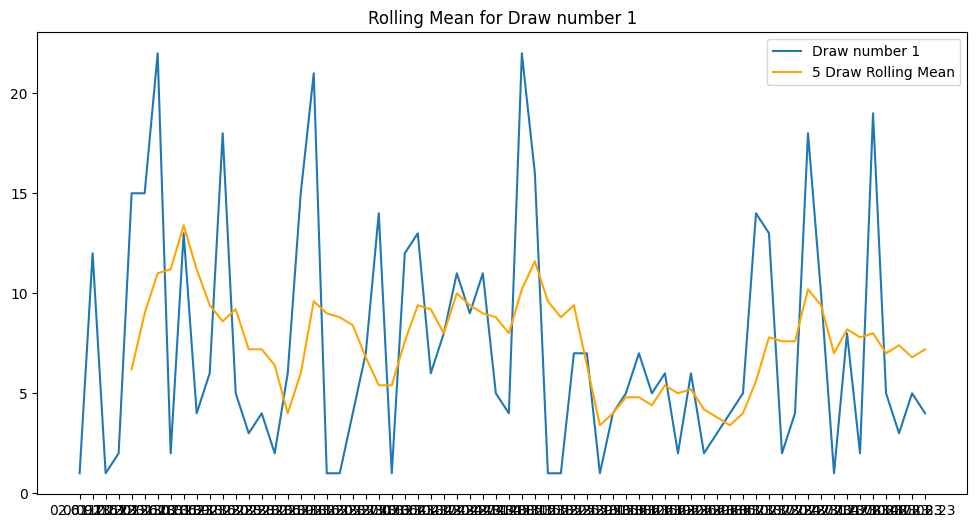

In [9]:
# Rolling mean for 'Draw number 1'
rolling_mean = data['Draw number 1'].rolling(window=5).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Date by Month'], data['Draw number 1'], label='Draw number 1')
plt.plot(data['Date by Month'], rolling_mean, label='5 Draw Rolling Mean', color='orange')
plt.legend(loc='best')
plt.title('Rolling Mean for Draw number 1')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


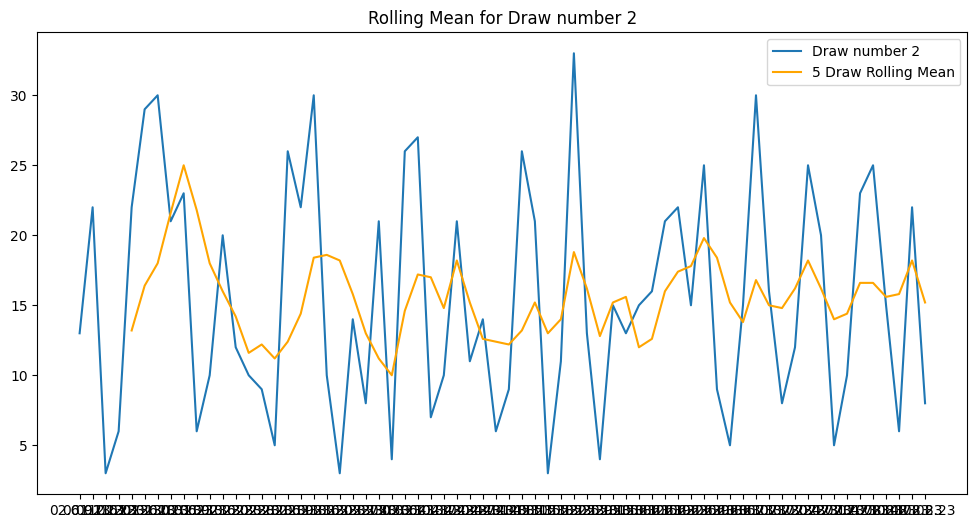

In [12]:
# Rolling mean for 'Draw number 2'
rolling_mean = data['Draw number 2'].rolling(window=5).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Date by Month'], data['Draw number 2'], label='Draw number 2')
plt.plot(data['Date by Month'], rolling_mean, label='5 Draw Rolling Mean', color='orange')
plt.legend(loc='best')
plt.title('Rolling Mean for Draw number 2')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


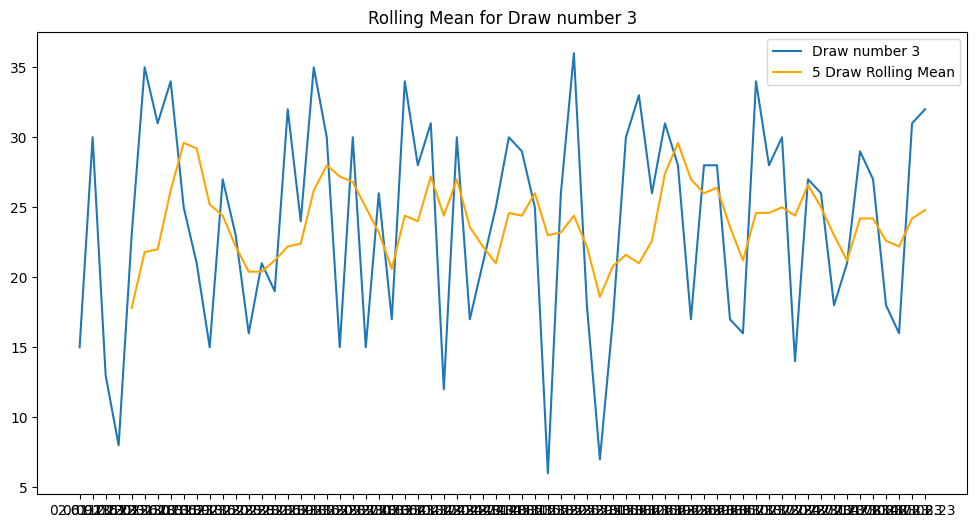

In [13]:
# Rolling mean for 'Draw number 3'
rolling_mean = data['Draw number 3'].rolling(window=5).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Date by Month'], data['Draw number 3'], label='Draw number 3')
plt.plot(data['Date by Month'], rolling_mean, label='5 Draw Rolling Mean', color='orange')
plt.legend(loc='best')
plt.title('Rolling Mean for Draw number 3')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


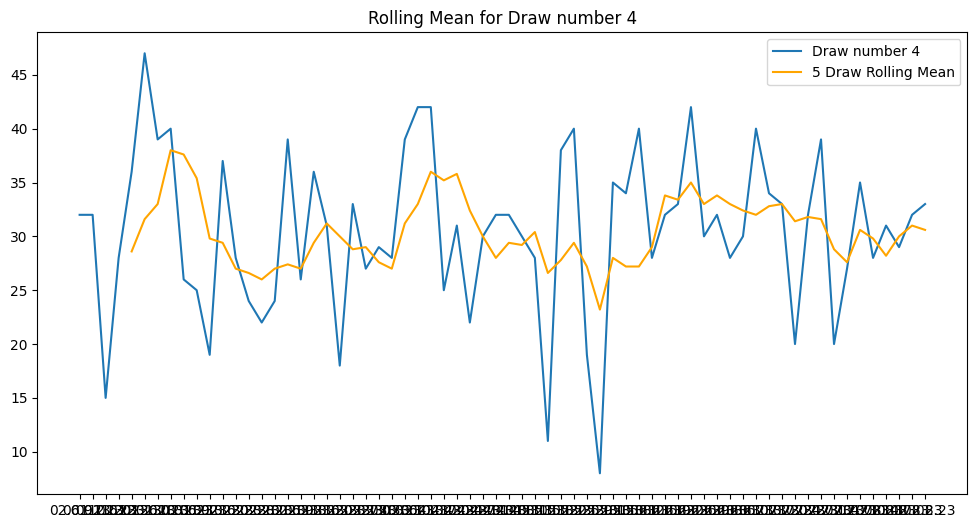

In [14]:
# Rolling mean for 'Draw number 4'
rolling_mean = data['Draw number 4'].rolling(window=5).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Date by Month'], data['Draw number 4'], label='Draw number 4')
plt.plot(data['Date by Month'], rolling_mean, label='5 Draw Rolling Mean', color='orange')
plt.legend(loc='best')
plt.title('Rolling Mean for Draw number 4')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


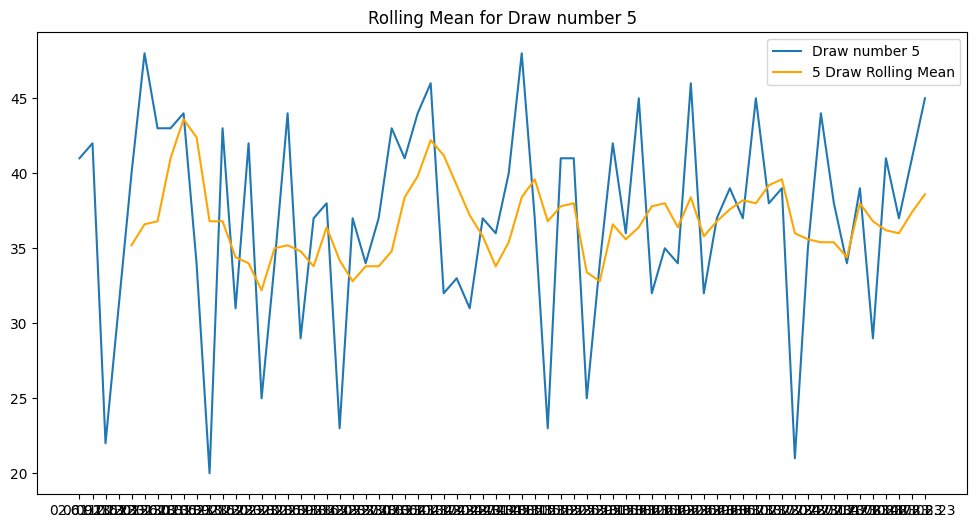

In [15]:
# Rolling mean for 'Draw number 5'
rolling_mean = data['Draw number 5'].rolling(window=5).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Date by Month'], data['Draw number 5'], label='Draw number 5')
plt.plot(data['Date by Month'], rolling_mean, label='5 Draw Rolling Mean', color='orange')
plt.legend(loc='best')
plt.title('Rolling Mean for Draw number 5')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


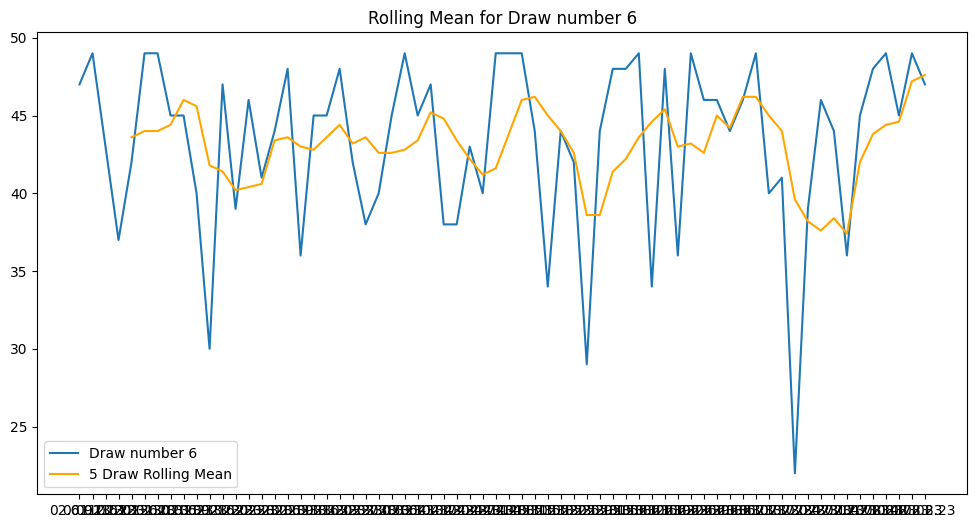

In [16]:
# Rolling mean for 'Draw number 6'
rolling_mean = data['Draw number 6'].rolling(window=5).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Date by Month'], data['Draw number 6'], label='Draw number 6')
plt.plot(data['Date by Month'], rolling_mean, label='5 Draw Rolling Mean', color='orange')
plt.legend(loc='best')
plt.title('Rolling Mean for Draw number 6')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: title={'center': 'Rolling Mean of Additional Numbers'}>

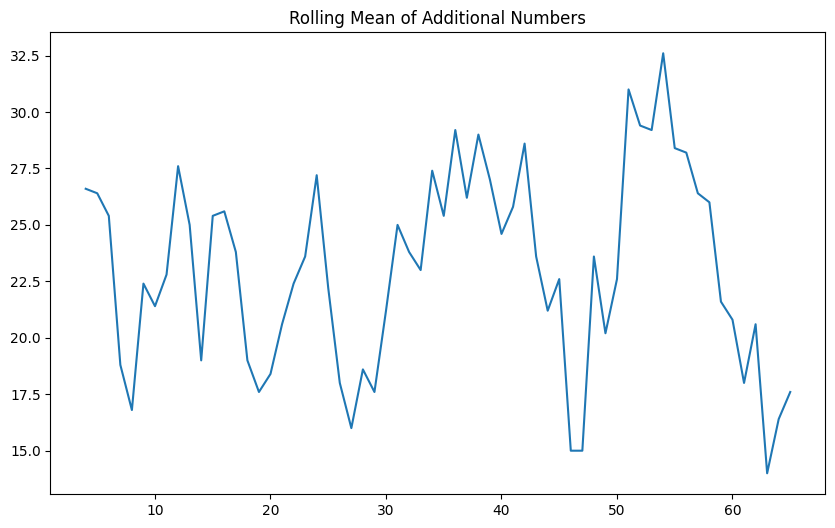

In [17]:
import pandas as pd

# Assuming your dataframe is named 'data' and the column for the additional number is 'Additional Number'
rolling_mean = data['Additional Number'].rolling(window=5).mean()

# Plotting the rolling mean
rolling_mean.plot(title='Rolling Mean of Additional Numbers', figsize=(10,6))


In [18]:
# Example using Z-Score for anomaly detection
from scipy.stats import zscore

z_scores = zscore(data['Additional Number'])
abs_z_scores = np.abs(z_scores)
anomalies = (abs_z_scores > 3)  # A common threshold, but can be adjusted


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# Assuming 'data' is your DataFrame and you've reshaped it so each row represents one draw and columns are the drawn numbers
shifted_data = data.shift(1)  # Shifts the data by one row
merged_data = pd.concat([data, shifted_data], axis=1)

# Now, you can analyze if, for example, after a '1' is drawn in the first position, what numbers tend to be drawn in the next draw's first position.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
from scipy.stats import zscore

# For the "Additional Number" column
z_scores = zscore(data['Additional Number'])
abs_z_scores = np.abs(z_scores)
anomalies = data[abs_z_scores > 3]  # Filter data points that are considered anomalies


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# For simplicity, let's consider predicting the "Additional Number" based on the date (converted to ordinal for regression purposes)
data['Date by Month'] = pd.to_datetime(data['Date by Month'])
X = data['Date by Month'].apply(lambda x: x.toordinal()).values.reshape(-1, 1)
y = data['Additional Number']

# Transforming the data to include polynomial features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression().fit(X_poly, y)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# Assuming 'data' is your DataFrame and you've reshaped it so each row represents one draw and columns are the drawn numbers
shifted_data = data.shift(1)  # Shifts the data by one row
merged_data = pd.concat([data, shifted_data], axis=1)

# Now, you can analyze if, for example, after a '1' is drawn in the first position, what numbers tend to be drawn in the next draw's first position.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# Example: Checking which numbers tend to follow the number '1' in the first position of the draw
following_numbers = merged_data[merged_data.iloc[:, 0] == 1].iloc[:, 7].value_counts()
print(following_numbers)


Series([], Name: Additional Number, dtype: int64)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


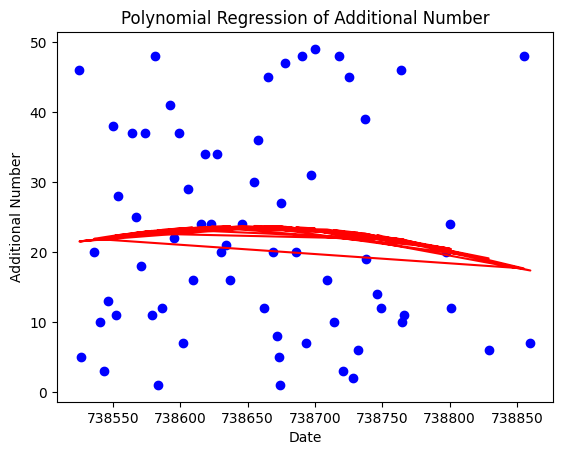

In [26]:
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_poly)

# Plotting
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Polynomial Regression of Additional Number')
plt.xlabel('Date')
plt.ylabel('Additional Number')
plt.show()
